# Assignmet 11 

# HW1

## Find a simple dataset with a one-humped histogram and model it by matching with the pdfs we learned till today. Find the most likely parameters for your pdf using MOM. 

Please find an original dataset. Don't use a boring dataset that everyone can easily google for :-)

# Method of Moments

### Data Set: Forest Fires

The data set contains information about forest fires, likely relevant for predicting or understanding fire behavior. Here's a breakdown of the columns:

1. **Y:** This column seems to represent some sort of categorical identifier. Without further context, it's hard to determine its exact meaning.

2. **month:** Indicates the month in which the forest fire occurred.

3. **day:** Indicates the day of the week when the forest fire occurred.

4. **FFMC:** Fine Fuel Moisture Code - a numeric rating of the moisture content of litter and other cured fine fuels.

5. **DMC:** Duff Moisture Code - a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth.

6. **DC:** Drought Code - a numeric rating of the average moisture content of deep, compact organic layers.

7. **ISI:** Initial Spread Index - a numeric rating of the expected rate of fire spread.

8. **temp:** Temperature in Celsius at the time of the observation.

9. **RH:** Relative humidity in percentage at the time of the observation.

10. **wind:** Wind speed in km/h at the time of the observation.

11. **rain:** Outside rain in mm/m² in the 24 hours preceding the observation.

12. **area:** The area of the forest affected by the fire, in hectares.

**Import Necessary Libraries**

In [52]:
import numpy as np
import scipy.stats as st
import statsmodels.datasets
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats.distributions import gamma
import pandas as pd

In [53]:
df = pd.read_csv('forestfires.csv', index_col=0) # Reading the data set

df.head() 

,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,,,,,,,,,,,,
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


**Shape of the DataFrame**

In [54]:
df.shape # It gives number of rows and columns

(517, 12)

**Checking for any null values in the DataSet**

In [55]:
df.isnull().sum()

Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

**Checking the features and data types**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 7 to 6
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       517 non-null    int64  
 1   month   517 non-null    object 
 2   day     517 non-null    object 
 3   FFMC    517 non-null    float64
 4   DMC     517 non-null    float64
 5   DC      517 non-null    float64
 6   ISI     517 non-null    float64
 7   temp    517 non-null    float64
 8   RH      517 non-null    int64  
 9   wind    517 non-null    float64
 10  rain    517 non-null    float64
 11  area    517 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 52.5+ KB


**Plotting the Distributions of the Independent Features**

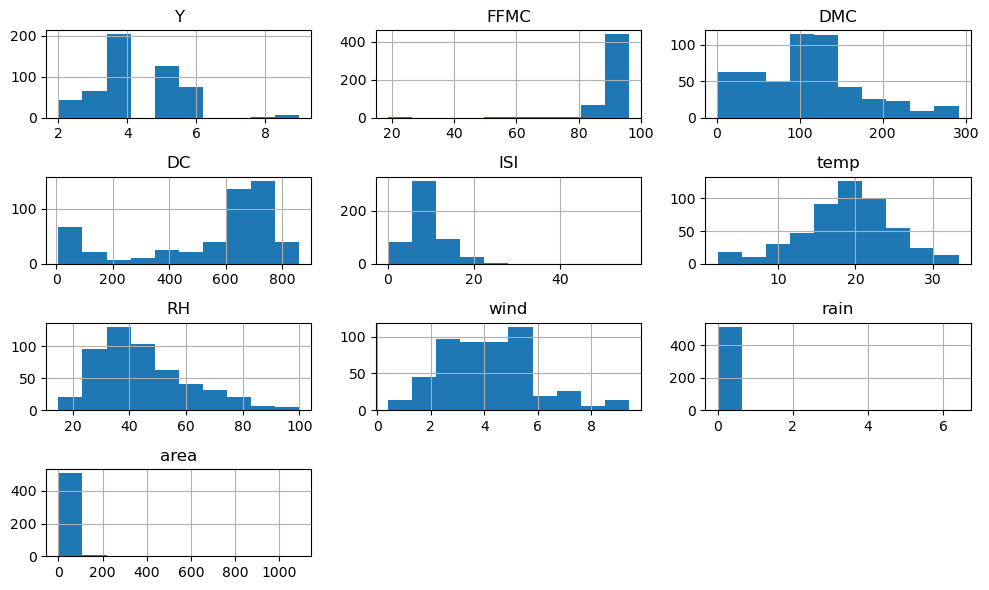

In [57]:
df.hist(figsize=(10, 6), bins=10)  # Adjust figsize and bins as needed
plt.tight_layout()
plt.show()

**We are calculating Alpha and Beta values for the `temp` column because it looks like a gamma distribution**

## Finding Alpha and Beta paramenters

In [58]:
mean = df['temp'].mean()
var = df['temp'].var()
print("Mean: ", mean, "\nVariance: ", var)
alpha_mom = (mean ** 2)/var
beta_mom = var/mean

alpha_mom, beta_mom

Mean:  18.88916827852998 
Variance:  33.7168979503096


(10.582251035681264, 1.7849858423164817)

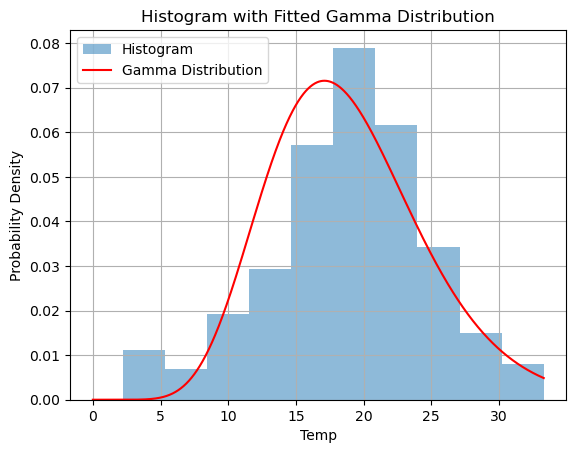

In [59]:
from scipy.stats.distributions import gamma

x = np.linspace(0, max(df['temp']), 1000)  # Generate x values for plotting
pdf = gamma.pdf(x, alpha_mom, scale=beta_mom)  # Compute the PDF of the fitted gamma distribution

# Plot histogram of data
plt.hist(df['temp'], density=True, alpha=0.5, label='Histogram')

# Plot fitted gamma distribution
plt.plot(x, pdf, 'r-', label='Gamma Distribution')

plt.xlabel('Temp')
plt.ylabel('Probability Density')
plt.title('Histogram with Fitted Gamma Distribution')
plt.legend()
plt.grid(True)
plt.show()


# HW2
## Building a generative model allowing you to actually roll your gaussian-loaded die and generate random variates.

In [60]:
# Importing numpy and matplotlib libraries to help calculate random variates and plot histogram
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Gaussian-loaded die - modified six-sided die where the probabilities of rolling each number are skewed according to a Gaussian (normal) distribution.
x = [1,2,3,4,5,6]
mean = np.mean(x)
std_dev = np.std(x)
num_rolls = 100

**Then, generating 100 random variates from it**

In [61]:
# Generate random variates from Gaussian distribution
random_variates = np.random.normal(mean, std_dev, num_rolls)

# Simulate rolling the die 100 times
dice_rolls = np.round(random_variates)

**Plotting their histogram**

(array([0.08510638, 0.13829787, 0.25531915, 0.21276596, 0.23404255,
        0.07446809]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

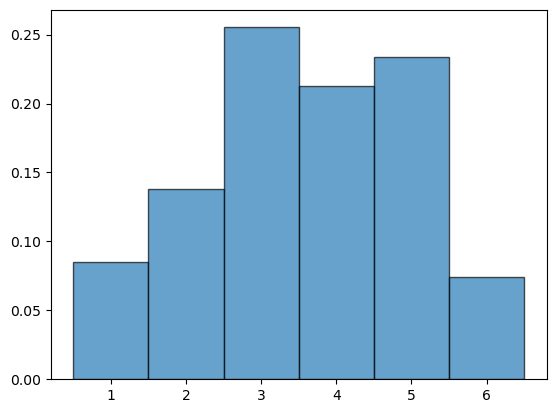

In [62]:
# Creates a histogram of the generated random variates, with bins representing possible die outcomes
# Every time we run this cell, we will get random probability for each face. 

plt.hist(dice_rolls, bins=np.arange(0.5, 7.5, 1), density=True, alpha=0.68, edgecolor='black')


## How close does it match the theoretical histogram?

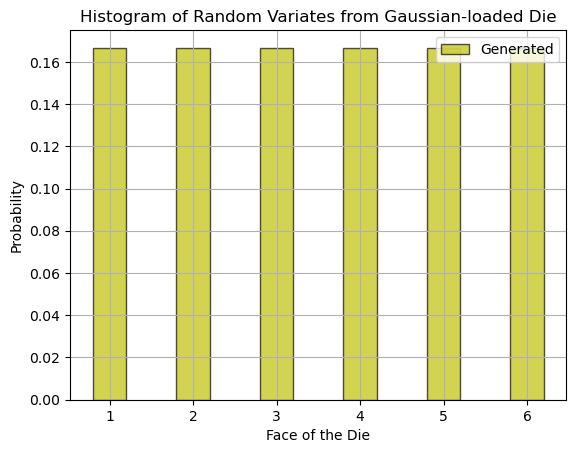

In [63]:
# Plot theoretical histogram (assuming each face of the die has equal probability)
plt.bar(range(1, 7), [1/6] * 6, width=0.4, alpha=0.68, color='y', edgecolor='black')

plt.xlabel('Face of the Die')
plt.ylabel('Probability')
plt.title('Histogram of Random Variates from Gaussian-loaded Die')
plt.xticks(range(1, 7))
plt.grid(True)
plt.legend(['Generated', 'Theoretical'])
plt.show()

## Evaluate the error.

In [64]:
# Calculate the average absolute error between the observed probabilities from the dice rolls and the theoretical probability of each outcome (1/6 for a fair six-sided die).

theoretical_prob = 1/6

# Calculates the observed probabilities. The density=True parameter normalizes the histogram to represent probabilities, and _ is used to discard the bin edges.
observed_counts, _ = np.histogram(dice_rolls, bins=np.arange(0.5, 7.5, 1), density=True)
error = np.abs(observed_counts - theoretical_prob).mean()

print("Average absolute error between observed and theoretical probabilities:", error)


Average absolute error between observed and theoretical probabilities: 0.0673758865248227


# HW3

## Find a simple dataset with a one-humped histogram and model it by matching with the pdfs we learned till today. Find the most likely parameters for your pdf using MLE. 

# Maximum Likelihood Estimation

### Importing necessary Libraries and writing a formula ###

### [scipy.special.psi](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.psi.html) = $\frac{\partial log(\Gamma(\alpha))}{\partial\alpha}$ and ###

### [scipy.special.polygamma](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.polygamma.html) = $\frac{\partial^2 log(\Gamma(\alpha))}{\partial\alpha^2}$ ###

**dlgamma and dl2gamma are used to calculate the derivatives of the log-likelihood function for the gamma distribution.**

In [65]:
from scipy.special import psi, polygamma
from scipy.optimize import newton

# Note that log_mean and mean_log are parameters of the dlgamma function
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

In [66]:
# Calculating log_mean and mean_Log

log_mean = np.log(df['temp'].mean())
mean_log = np.log(df['temp']).mean()

log_mean, mean_log

(2.9385886508209462, 2.8755428852335845)

In [67]:
#Calculating alpha mle

alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean, mean_log))
alpha_mle

8.09380816244548

In [68]:
# Calculating beta mle
beta_mle = alpha_mle/mean_log
beta_mle

2.8147061217582947

In [69]:
alpha_mom, beta_mom

(10.582251035681264, 1.7849858423164817)

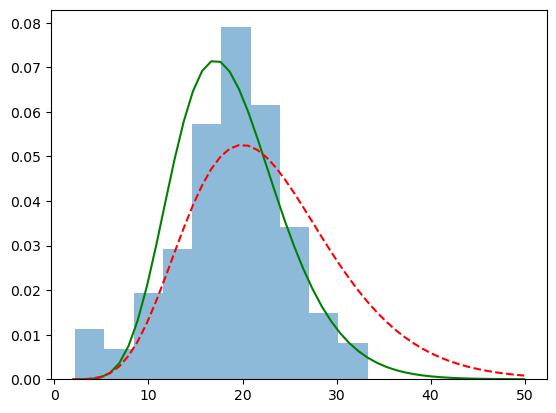

In [72]:
# Ploting MOM and MLE

from scipy.stats.distributions import gamma

data = df['temp']
#shape_mle, loc_mle, scale_mle = gamma.fit(df['L'])

data.hist(density=True, alpha=0.5, grid=False)
x = np.linspace(2, data.max()*1.5)
plt.plot(x, gamma.pdf(x, alpha_mom, scale=beta_mom), 'g-')
plt.plot(x, gamma.pdf(x, alpha_mle, scale=beta_mle), 'r--')

### Another approach

The gamma.fit() function from `SciPy` to estimate the parameters of a Gamma distribution that best fit the data in the 'temp' column of the DataFrame df.


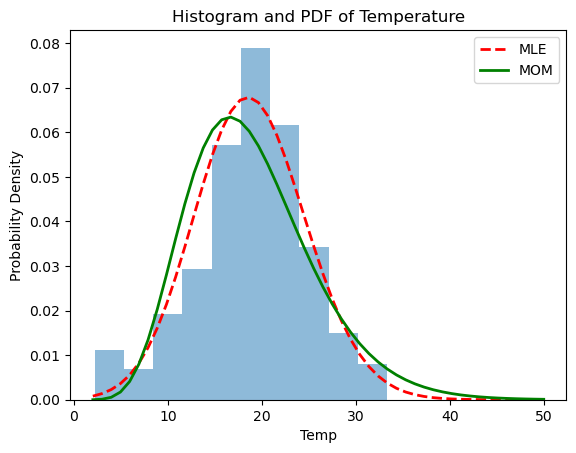

In [74]:
alpha_mle, loc_mle, beta_mle = gamma.fit(df['temp'])
"""

The gamma.fit() function estimates the parameters using the method of maximum likelihood estimation (MLE). 
It returns the shape (alpha), location (shift), and scale (beta) parameters of the fitted distribution. 

"""

plt.hist(df['temp'], alpha=0.5, density=True) # Plotting histogram

pdf_mle = gamma.pdf(x, alpha_mle, loc=loc_mle, scale=beta_mle) # Plotting MLE
plt.plot(x, pdf_mle, 'r--', linewidth=2, label="MLE")

alpha_mom, loc_mom, beta_mom = gamma.fit(df['temp'], floc=0)
"""

The gamma.fit() function estimates the parameters using the method of moments (MOM). 
It returns the shape (alpoha), location (shift), and scale (beta) parameters of the fitted distribution.

"""
pdf_mom = gamma.pdf(x, alpha_mom, loc=loc_mom, scale=beta_mom)
plt.plot(x, pdf_mom, 'g-', linewidth=2, label="MOM")

# Adding labels and title
plt.xlabel('Temp')
plt.ylabel('Probability Density')
plt.title('Histogram and PDF of Temperature')

# Show the plot
plt.legend()
plt.show()